# Load Necessaries

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Regressor

In [7]:
from utils.preprocessing_withval import Makeloader, create_loaders, create_raw_loaders
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



In [60]:
train_loader, val_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4",
    ],
    modalities=['Acc','Force','Acoustic'],
    batch_size=32,
    train_val_ratio=0.9,
)




xb, yb = next(iter(train_loader))
seq_len  = xb.shape[1]   # 84(12*7)
input_sz = xb.shape[-1]  # 보통 84 (Acc3+Force3+Acoustic1)
print(seq_len, input_sz)


84 84


Epoch 1/200 | Train Loss: 41129.0583 | Val Loss: 34300.9381
Epoch 2/200 | Train Loss: 28192.9615 | Val Loss: 24392.5168
Epoch 3/200 | Train Loss: 19984.8299 | Val Loss: 17326.9352
Epoch 4/200 | Train Loss: 14131.8239 | Val Loss: 12287.3775
Epoch 5/200 | Train Loss: 10053.3936 | Val Loss: 8823.0187
Epoch 6/200 | Train Loss: 7321.1665 | Val Loss: 6526.3914
Epoch 7/200 | Train Loss: 5586.7060 | Val Loss: 5093.7995
Epoch 8/200 | Train Loss: 4564.6584 | Val Loss: 4261.2873
Epoch 9/200 | Train Loss: 3969.6036 | Val Loss: 3800.9562
Epoch 10/200 | Train Loss: 3440.4477 | Val Loss: 3090.9117
Epoch 11/200 | Train Loss: 2550.8427 | Val Loss: 2096.6179
Epoch 12/200 | Train Loss: 1684.7014 | Val Loss: 1544.2153
Epoch 13/200 | Train Loss: 1255.7034 | Val Loss: 1209.9346
Epoch 14/200 | Train Loss: 942.1012 | Val Loss: 820.4794
Epoch 15/200 | Train Loss: 645.4190 | Val Loss: 682.2493
Epoch 16/200 | Train Loss: 489.6246 | Val Loss: 568.0018
Epoch 17/200 | Train Loss: 400.2708 | Val Loss: 488.0149
Epoch

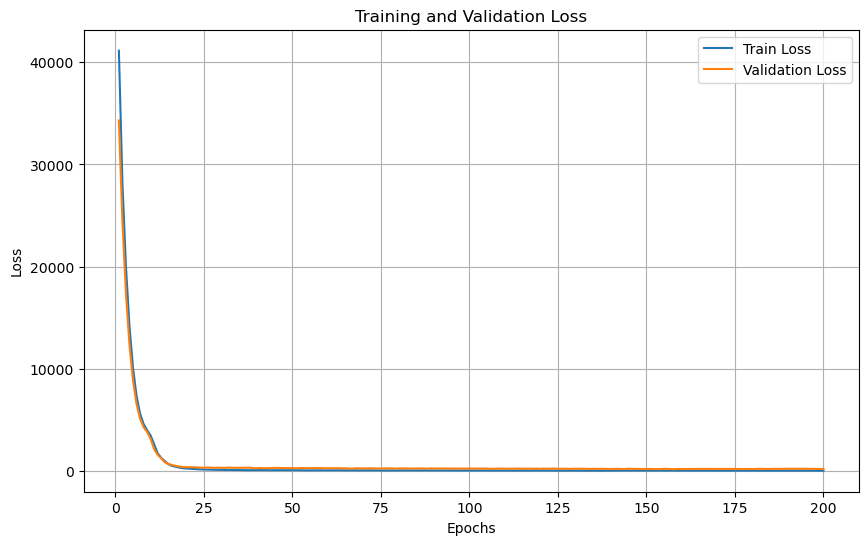

Train ended.


In [61]:
model = GRURegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


In [62]:
test_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8",
    ],
    modalities=['Acc','Force','Acoustic'],  
    batch_size=32,
    train_val_ratio=None,
)

Evaluation Metrics:
RMSE: 20.0903
MAE : 17.3398
R²  : 0.8728
MAPE: 9.78%
Explained Var: 0.9081


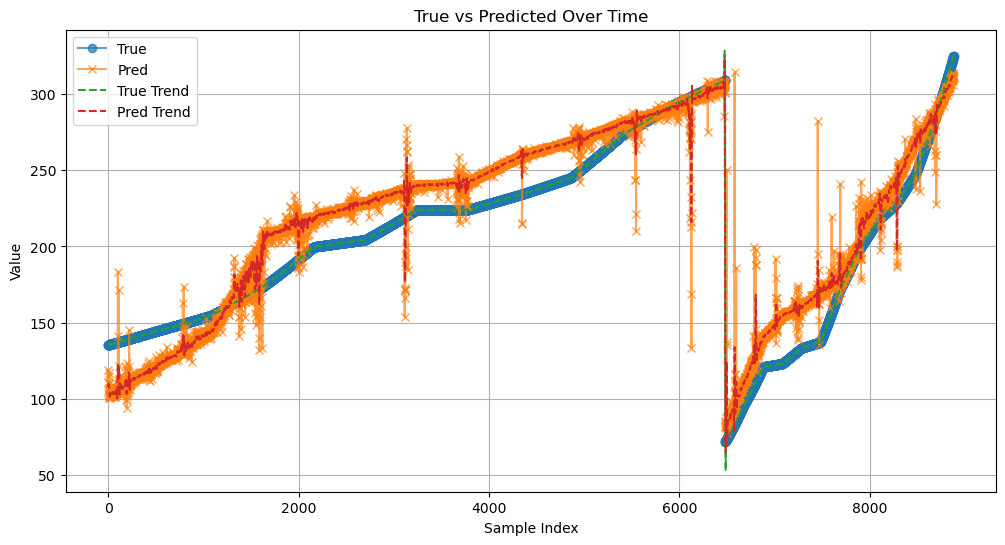

Test Metrics:
RMSE: 20.0903
MAE: 17.3398
R² Score: 0.8728
MAPE: 9.78%
Explained Variance Score: 0.9081


In [63]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [20]:
train_loader, val_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4",
    ],
    modalities=['Acc','Force'],#,'Acoustic'],
    batch_size=32,
    train_val_ratio=0.9,
)




xb, yb = next(iter(train_loader))
seq_len  = xb.shape[1]   # 84(12*7)
input_sz = xb.shape[-1]  # 보통 84 (Acc3+Force3+Acoustic1)
print(seq_len, input_sz)


72 72


In [27]:
train_loader_all = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4",
    ],
    modalities=['Acc','Force'],#,'Acoustic'],
    batch_size=32,
    train_val_ratio=None,
)

In [23]:
test_loader = create_loaders(
    directories=[
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5",
        "/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8",
    ],
    modalities=['Acc','Force'],#,'Acoustic'],  
    batch_size=32,
    train_val_ratio=None,
)

In [24]:
# hyperparameter settings
input_size = input_sz  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500

In [15]:
from model.regressor import GRURegressor
from utils.train import train_model
from utils.test import evaluate_model
import numpy as np

Epoch 1/200 | Train Loss: 41067.3343 | Val Loss: 32735.7448
Epoch 2/200 | Train Loss: 28202.2474 | Val Loss: 23173.3985
Epoch 3/200 | Train Loss: 19990.0000 | Val Loss: 16399.9809
Epoch 4/200 | Train Loss: 14135.2180 | Val Loss: 11627.6031
Epoch 5/200 | Train Loss: 10047.2126 | Val Loss: 8377.7526
Epoch 6/200 | Train Loss: 7311.7910 | Val Loss: 6277.7751
Epoch 7/200 | Train Loss: 5564.8183 | Val Loss: 5007.9181
Epoch 8/200 | Train Loss: 4520.5181 | Val Loss: 4253.7757
Epoch 9/200 | Train Loss: 3810.2072 | Val Loss: 3654.4861
Epoch 10/200 | Train Loss: 2736.7653 | Val Loss: 2336.5704
Epoch 11/200 | Train Loss: 1971.6076 | Val Loss: 1882.7392
Epoch 12/200 | Train Loss: 1506.8954 | Val Loss: 1456.8751
Epoch 13/200 | Train Loss: 1193.8979 | Val Loss: 1223.2002
Epoch 14/200 | Train Loss: 904.9025 | Val Loss: 953.7036
Epoch 15/200 | Train Loss: 667.6177 | Val Loss: 739.8970
Epoch 16/200 | Train Loss: 517.0461 | Val Loss: 578.2834
Epoch 17/200 | Train Loss: 392.4376 | Val Loss: 498.7168
Epoch

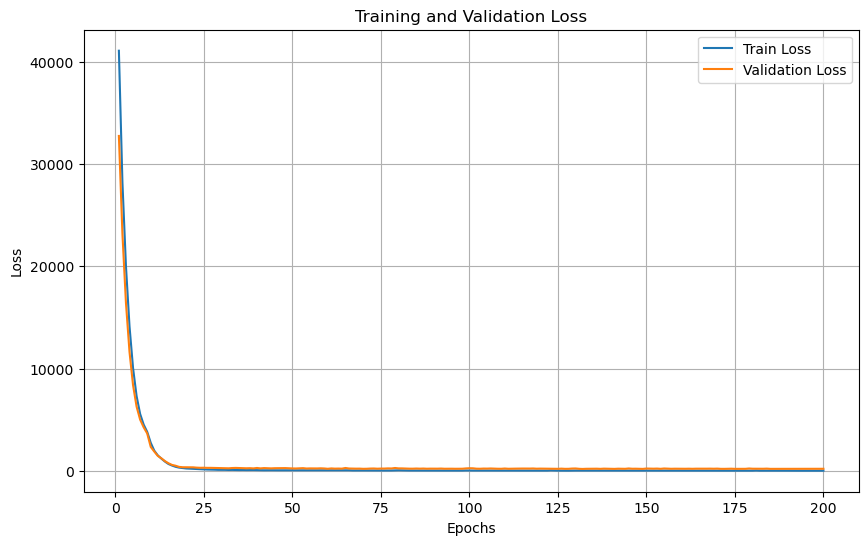

Train ended.


In [21]:
model = GRURegressor(input_size=input_sz,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


Evaluation Metrics:
RMSE: 5.4300
MAE : 1.3142
R²  : 0.9916
MAPE: 0.75%
Explained Var: 0.9916


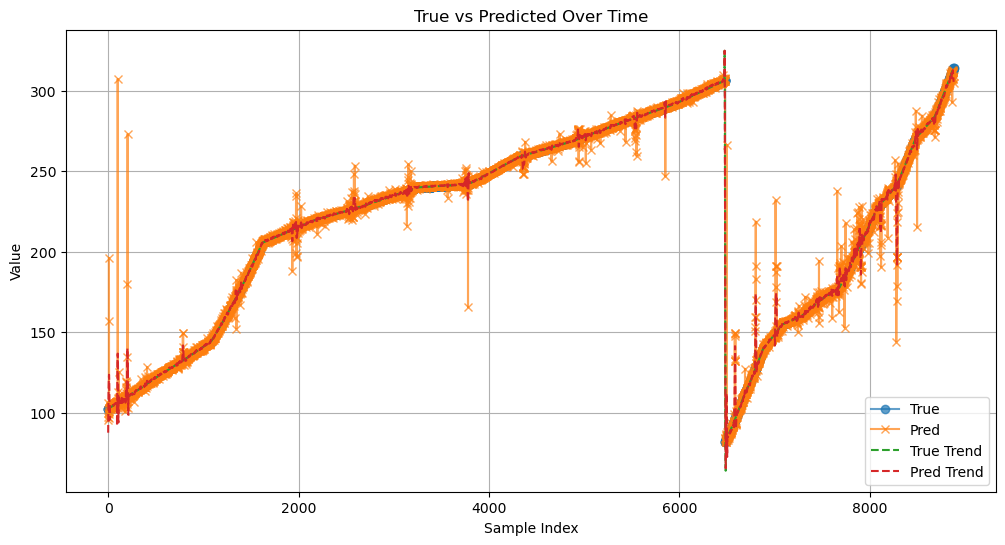

Test Metrics:
RMSE: 5.4300
MAE: 1.3142
R² Score: 0.9916
MAPE: 0.75%
Explained Variance Score: 0.9916


In [28]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, train_loader_all, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [29]:
import pandas as pd
import os

# 저장 경로 지정
save_dir = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "gru_T1T4_predictions.csv")

# DataFrame으로 변환
df = pd.DataFrame({
    "True_Label": all_labels,
    "Predicted": all_preds
})

# CSV 저장
df.to_csv(save_path, index=False)

print(f"Predictions saved to: {save_path}")

✅ Predictions saved to: /home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T1T4_predictions.csv


Evaluation Metrics:
RMSE: 20.1327
MAE : 17.3941
R²  : 0.8722
MAPE: 9.79%
Explained Var: 0.9086


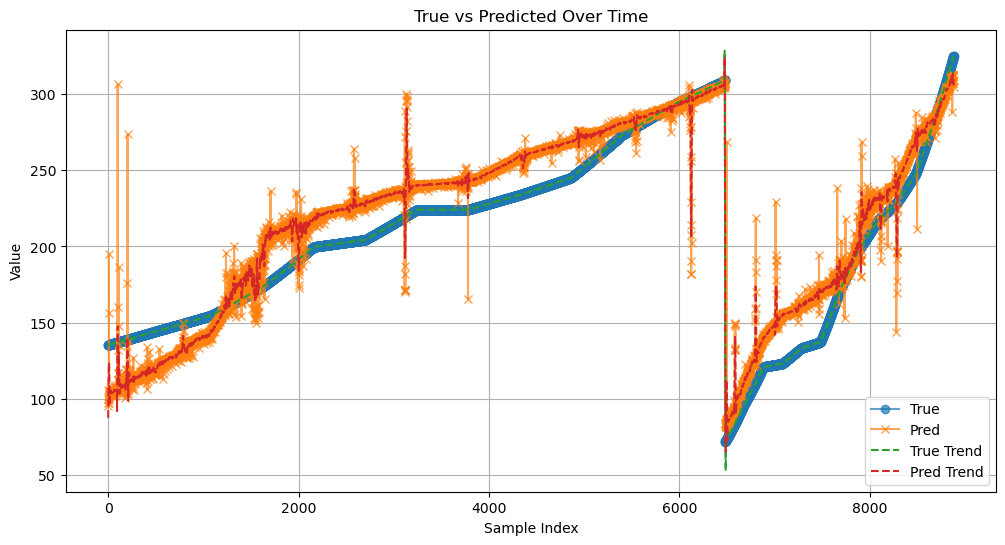

Test Metrics:
RMSE: 20.1327
MAE: 17.3941
R² Score: 0.8722
MAPE: 9.79%
Explained Variance Score: 0.9086


In [25]:
# Evaluate the model and visualize
from utils.test import evaluate_model
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [26]:
import pandas as pd
import os

# 저장 경로 지정
save_dir = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "gru_T5T8_predictions.csv")

# DataFrame으로 변환
df = pd.DataFrame({
    "True_Label": all_labels,
    "Predicted": all_preds
})

# CSV 저장
df.to_csv(save_path, index=False)

print(f"Predictions saved to: {save_path}")


✅ Predictions saved to: /home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T5T8_predictions.csv


# Classifier

In [3]:
from model.classifier import CNNClassifier

In [13]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
from utils.utils import MelSpectrogramDataset


train_data_dir_T1 = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T1"  
test_data_dir_T5 = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T5" 
train_data_dir_T4 = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T4" 
test_data_dir_T8 = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T8" 

batch_size = 32
num_epochs = 10
learning_rate = 0.001
image_size = (128, 128)

train_anomaly_threshold_T1 = 4041  
test_anomaly_threshold_T5 = 4961  
train_anomaly_threshold_T4 = 1863  
test_anomaly_threshold_T8 = 2016  

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],  # ← RGB 3채널이면 3개 지정
                         std=[0.5, 0.5, 0.5])
])


train_dataset_T1 = MelSpectrogramDataset(
    data_dir=train_data_dir_T1,
    train_anomaly_threshold=train_anomaly_threshold_T1,
    transform=transform
)

train_dataset_T4 = MelSpectrogramDataset(
    data_dir=train_data_dir_T4,
    train_anomaly_threshold=train_anomaly_threshold_T4,
    transform=transform
)

test_dataset_T5 = MelSpectrogramDataset(
    data_dir=test_data_dir_T5,
    train_anomaly_threshold=test_anomaly_threshold_T5,
    transform=transform
)

test_dataset_T8 = MelSpectrogramDataset(
    data_dir=test_data_dir_T8,
    train_anomaly_threshold=test_anomaly_threshold_T8,
    transform=transform
)



In [30]:


batch_size = 32
num_epochs = 10
learning_rate = 0.001
image_size = (128, 128)
train_anomaly_threshold = 4041  # T1에서 4041 이후 Anomaly
test_anomaly_threshold = 4961  # T5에서 4961 이후 Anomaly


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


cnn = CNNClassifier().to(device)
# eff = EfficientNetBinary(pretrained=True).to(device)
# mob = MobileNetBinary(pretrained=True).to(device)
# res = ResNetClassifier(pretrained=True).to(device)
# vit = ViTBinary(pretrained=True).to(device)
# deit = DeiTBinary(pretrained=True).to(device)
# swin = SwinBinary(pretrained=True).to(device)
# beit = BEiTBinary(pretrained=True).to(device)



In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # tqdm 추가


train_loader_T1 = DataLoader(
    train_dataset_T1,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,        
    pin_memory=True,      
    persistent_workers=True 
)

train_loader_T4 = DataLoader(
    train_dataset_T4,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,        
    pin_memory=True,      
    persistent_workers=True 
)

test_loader_T5 = DataLoader(
    test_dataset_T5,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,       
    pin_memory=True,    
    persistent_workers=True 
)

test_loader_T8 = DataLoader(
    test_dataset_T8,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,         
    pin_memory=True,      
    persistent_workers=True 
)



In [32]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)
import numpy as np
import torch

def evaluate_test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    predictions = []

    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels, _ in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)

            predicted = (outputs > 0.5).float()
            probabilities = outputs.cpu().numpy().flatten() 

    
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            labels_np = labels.cpu().numpy().squeeze()
            for true_label, pred_prob in zip(labels_np, probabilities):
                predictions.append((int(true_label), pred_prob))

            all_labels.extend(labels_np.tolist())
            all_probs.extend(probabilities.tolist())

    accuracy = correct / total if total > 0 else 0.0

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)
    binary_preds = (all_probs > 0.5).astype(int)

    precision = precision_score(all_labels, binary_preds, zero_division=0)
    recall = recall_score(all_labels, binary_preds, zero_division=0)
    f1 = f1_score(all_labels, binary_preds, zero_division=0)

    try:
        auc_roc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc_roc = float("nan")

    try:
        auc_pr = average_precision_score(all_labels, all_probs)
    except ValueError:
        auc_pr = float("nan")

    # 출력 
    print(f"Test Accuracy : {accuracy:.4f}")
    print(f"Precision     : {precision:.4f}")
    print(f"Recall        : {recall:.4f}")
    print(f"F1-score      : {f1:.4f}")
    print(f"AUROC         : {auc_roc:.4f}")
    print(f"AUPRC         : {auc_pr:.4f}")

    return predictions  # 기존처럼 예측 결과 반환


### Vanilla CNN

In [33]:

model = CNNClassifier().to(device)
checkpoint_path = "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/model_weights/classifier_T1_cnn.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()



CNNClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [38]:
train_predictions_T1 = evaluate_test(model, train_loader_T1)

Test Accuracy : 0.9898
Precision     : 1.0000
Recall        : 0.9729
F1-score      : 0.9863
AUROC         : 1.0000
AUPRC         : 0.9999


In [39]:
import pandas as pd
df = pd.DataFrame(train_predictions_T1, columns=["true_label", "pred_prob"])

df.to_csv(
    "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T1_prediction_type3.csv",
    index=False
)



In [40]:
test_predictions_T5 = evaluate_test(model, test_loader_T5)

Test Accuracy : 0.8670
Precision     : 0.6384
Recall        : 0.9974
F1-score      : 0.7785
AUROC         : 0.9883
AUPRC         : 0.9612


In [41]:
import pandas as pd
df = pd.DataFrame(test_predictions_T5, columns=["true_label", "pred_prob"])

df.to_csv(
    "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T5_prediction_type3.csv",
    index=False
)



In [42]:

model = CNNClassifier().to(device)
checkpoint_path = "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/model_weights/classifier_T4_cnn.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()


CNNClassifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=65536, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [43]:
train_predictions_T4 = evaluate_test(model, train_loader_T4)

Test Accuracy : 0.9975
Precision     : 0.9963
Recall        : 0.9926
F1-score      : 0.9944
AUROC         : 1.0000
AUPRC         : 0.9999


In [44]:
import pandas as pd
df = pd.DataFrame(train_predictions_T4, columns=["true_label", "pred_prob"])

df.to_csv(
    "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T4_prediction_type3.csv",
    index=False
)



In [45]:
test_predictions_T8 = evaluate_test(model, test_loader_T8)

Test Accuracy : 0.9354
Precision     : 0.7140
Recall        : 0.9948
F1-score      : 0.8313
AUROC         : 0.9823
AUPRC         : 0.8883


In [46]:
import pandas as pd
df = pd.DataFrame(test_predictions_T8, columns=["true_label", "pred_prob"])

df.to_csv(
    "/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T8_prediction_type3.csv",
    index=False
)


### Multimodal Late Fusion

In [49]:
train_regression_pred = pd.read_csv("/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T1T4_predictions.csv")
test_regression_pred = pd.read_csv("/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/gru_T5T8_predictions.csv")


In [50]:
train_regression_pred

,True_Label,Predicted
0,102.472000,100.013855
1,102.507324,106.128357
2,102.542664,95.730209
3,102.578011,97.624084
4,102.613373,100.743164
...,...,...
8875,313.560638,307.001373
8876,313.721039,307.022919
8877,313.881500,308.185730
8878,314.042053,309.033203


In [51]:
test_regression_pred

,True_Label,Predicted
0,135.460007,100.005562
1,135.477280,106.225212
2,135.494553,95.739731
3,135.511841,97.605392
4,135.529114,100.747169
...,...,...
8875,324.028290,307.097717
8876,324.251007,307.141052
8877,324.473846,308.221344
8878,324.696838,309.039795


In [52]:
import pandas as pd

cnn_T1 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T1_prediction_type3.csv")
cnn_T4 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T4_prediction_type3.csv")


train_classifier_pred = pd.concat([cnn_T1, cnn_T4], ignore_index=True)



In [54]:
train_classifier_pred

,true_label,pred_prob
0,0,0.000021
1,0,0.000198
2,0,0.000019
3,0,0.000008
4,0,0.000311
...,...,...
8875,1,1.000000
8876,1,1.000000
8877,1,1.000000
8878,1,1.000000


In [55]:
import pandas as pd

cnn_T5 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T5_prediction_type3.csv")
cnn_T8 = pd.read_csv("/home/crois-times/timeseries/JJ/Multimodal_Havard_2509/prediction/cnn_T8_prediction_type3.csv")


test_classifier_pred = pd.concat([cnn_T5, cnn_T8], ignore_index=True)


In [56]:
test_classifier_pred

,true_label,pred_prob
0,0,0.000021
1,0,0.000198
2,0,0.000019
3,0,0.000008
4,0,0.000311
...,...,...
8875,1,1.000000
8876,1,1.000000
8877,1,1.000000
8878,1,1.000000


### Multimodal-inference(stacking layer)

In [59]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score



assert len(train_regression_pred) == len(train_classifier_pred), "train 길이가 다릅니다."
assert len(test_regression_pred)  == len(test_classifier_pred),  "test 길이가 다릅니다."

X_train = np.column_stack([
    train_regression_pred['Predicted'].values.astype(np.float32),
    train_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_train = train_regression_pred['True_Label'].values.astype(np.float32)

X_test = np.column_stack([
    test_regression_pred['Predicted'].values.astype(np.float32),
    test_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_test = test_regression_pred['True_Label'].values.astype(np.float32)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_t = torch.tensor(X_train_std, dtype=torch.float32, device=device)
y_train_t = torch.tensor(y_train,     dtype=torch.float32, device=device).unsqueeze(1)

X_test_t  = torch.tensor(X_test_std,  dtype=torch.float32, device=device)
y_test_t  = torch.tensor(y_test,      dtype=torch.float32, device=device).unsqueeze(1)


class MLPStackingRegressor(nn.Module):
    def __init__(self, in_dim=2, h1=64, h2=32):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)            
        return x

model = MLPStackingRegressor(in_dim=X_train_t.shape[1]).to(device)

# 학습 설정 
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 1000 
batch_size = 256
num_samples = X_train_t.shape[0]
indices = torch.arange(num_samples, device=device)

# 학습 루프 
model.train()
for epoch in range(1, epochs + 1):

    perm = indices[torch.randperm(num_samples)]
    epoch_loss = 0.0

    for start in range(0, num_samples, batch_size):
        end = start + batch_size
        idx = perm[start:end]
        xb = X_train_t[idx]
        yb = y_train_t[idx]

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if epoch % 200 == 0 or epoch == 1:
        print(f"[{epoch:4d}/{epochs}] loss={epoch_loss:.6f}")

print("Train ended.")


model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t).squeeze(1).cpu().numpy()

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae  = mean_absolute_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)

eps = 1e-8
mape = (np.abs((y_test - y_pred_test) / (np.abs(y_test) + eps))).mean() * 100.0
evs  = explained_variance_score(y_test, y_pred_test)

print("\n===== Stacking MLP (Regression) on TEST =====")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R^2  : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"EVS  : {evs:.4f}")


out_df = pd.DataFrame({
    "True_Label": y_test,
    "Stacked_Pred": y_pred_test,
    "Base_Regression_Pred": X_test[:, 0], 
    "Classifier_prob": X_test[:, 1]
})
save_path = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/stacking_test_predictions.csv"
out_df.to_csv(save_path, index=False)
print(f"💾 Saved: {save_path}")


[   1/1000] loss=1763095.621094
[ 200/1000] loss=1028.576271
[ 400/1000] loss=898.190012
[ 600/1000] loss=845.188992
[ 800/1000] loss=799.914776
[1000/1000] loss=770.067633
✅ Train ended.

===== Stacking MLP (Regression) on TEST =====
RMSE : 19.7129
MAE  : 17.2893
R^2  : 0.8775
MAPE : 9.75%
EVS  : 0.9129
💾 Saved: /home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/stacking_test_predictions.csv


In [57]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score



assert len(train_regression_pred) == len(train_classifier_pred), "train 길이가 다릅니다."
assert len(test_regression_pred)  == len(test_classifier_pred),  "test 길이가 다릅니다."

X_train = np.column_stack([
    train_regression_pred['Predicted'].values.astype(np.float32),
    train_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_train = train_regression_pred['True_Label'].values.astype(np.float32)

X_test = np.column_stack([
    test_regression_pred['Predicted'].values.astype(np.float32),
    test_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_test = test_regression_pred['True_Label'].values.astype(np.float32)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_t = torch.tensor(X_train_std, dtype=torch.float32, device=device)
y_train_t = torch.tensor(y_train,     dtype=torch.float32, device=device).unsqueeze(1)

X_test_t  = torch.tensor(X_test_std,  dtype=torch.float32, device=device)
y_test_t  = torch.tensor(y_test,      dtype=torch.float32, device=device).unsqueeze(1)

#  MLP 스태킹 회귀 모델 
class MLPStackingRegressor(nn.Module):
    def __init__(self, in_dim=2, h1=64, h2=32):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)            # 회귀 → 출력에 Sigmoid 없음
        return x

model = MLPStackingRegressor(in_dim=X_train_t.shape[1]).to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 3000  
batch_size = 256
num_samples = X_train_t.shape[0]
indices = torch.arange(num_samples, device=device)

#  6) 학습 루프 
model.train()
for epoch in range(1, epochs + 1):
    # 미니배치 셔플
    perm = indices[torch.randperm(num_samples)]
    epoch_loss = 0.0

    for start in range(0, num_samples, batch_size):
        end = start + batch_size
        idx = perm[start:end]
        xb = X_train_t[idx]
        yb = y_train_t[idx]

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if epoch % 200 == 0 or epoch == 1:
        print(f"[{epoch:4d}/{epochs}] loss={epoch_loss:.6f}")

print("Train ended.")

#7) 테스트 예측 & 지표 
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t).squeeze(1).cpu().numpy()

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae  = mean_absolute_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)
# 0으로 나눔 방지용: y_test가 0 포함할 수 있으므로 작은 eps 추가
eps = 1e-8
mape = (np.abs((y_test - y_pred_test) / (np.abs(y_test) + eps))).mean() * 100.0
evs  = explained_variance_score(y_test, y_pred_test)

print("\n===== Stacking MLP (Regression) on TEST =====")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R^2  : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"EVS  : {evs:.4f}")

# --------- 8) (선택) 예측 저장 ----------
out_df = pd.DataFrame({
    "True_Label": y_test,
    "Stacked_Pred": y_pred_test,
    "Base_Regression_Pred": X_test[:, 0],  # 원본 회귀 베이스라인(스케일링 전 값)
    "Classifier_prob": X_test[:, 1]
})
save_path = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/stacking_test_predictions.csv"
out_df.to_csv(save_path, index=False)
print(f"💾 Saved: {save_path}")


[   1/3000] loss=1764626.152344
[ 200/3000] loss=1042.653861
[ 400/3000] loss=979.317492
[ 600/3000] loss=986.349373
[ 800/3000] loss=971.011780
[1000/3000] loss=963.836848
[1200/3000] loss=946.846068
[1400/3000] loss=939.430856
[1600/3000] loss=924.345400
[1800/3000] loss=922.581831
[2000/3000] loss=914.846451
[2200/3000] loss=907.961474
[2400/3000] loss=894.826068
[2600/3000] loss=892.074755
[2800/3000] loss=892.516227
[3000/3000] loss=879.056007
✅ Train ended.

===== Stacking MLP (Regression) on TEST =====
RMSE : 19.5977
MAE  : 17.1082
R^2  : 0.8789
MAPE : 9.65%
EVS  : 0.9118
💾 Saved: /home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/stacking_test_predictions.csv


In [58]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# 길이 체크 (안 맞으면 에러)
assert len(train_regression_pred) == len(train_classifier_pred), "train 길이가 다릅니다."
assert len(test_regression_pred)  == len(test_classifier_pred),  "test 길이가 다릅니다."

X_train = np.column_stack([
    train_regression_pred['Predicted'].values.astype(np.float32),
    train_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_train = train_regression_pred['True_Label'].values.astype(np.float32)

X_test = np.column_stack([
    test_regression_pred['Predicted'].values.astype(np.float32),
    test_classifier_pred['pred_prob'].values.astype(np.float32)
])
y_test = test_regression_pred['True_Label'].values.astype(np.float32)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

# Torch Tensor 변환 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_t = torch.tensor(X_train_std, dtype=torch.float32, device=device)
y_train_t = torch.tensor(y_train,     dtype=torch.float32, device=device).unsqueeze(1)

X_test_t  = torch.tensor(X_test_std,  dtype=torch.float32, device=device)
y_test_t  = torch.tensor(y_test,      dtype=torch.float32, device=device).unsqueeze(1)


class MLPStackingRegressor(nn.Module):
    def __init__(self, in_dim=2, h1=64, h2=32):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)            # 회귀 → 출력에 Sigmoid 없음
        return x

model = MLPStackingRegressor(in_dim=X_train_t.shape[1]).to(device)

# 학습 설정 
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 20000  # 필요시 조정


batch_size = 256
num_samples = X_train_t.shape[0]
indices = torch.arange(num_samples, device=device)
model.train()
for epoch in range(1, epochs + 1):

    perm = indices[torch.randperm(num_samples)]
    epoch_loss = 0.0

    for start in range(0, num_samples, batch_size):
        end = start + batch_size
        idx = perm[start:end]
        xb = X_train_t[idx]
        yb = y_train_t[idx]

        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    if epoch % 200 == 0 or epoch == 1:
        print(f"[{epoch:4d}/{epochs}] loss={epoch_loss:.6f}")

print("Train ended.")


model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t).squeeze(1).cpu().numpy()

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae  = mean_absolute_error(y_test, y_pred_test)
r2   = r2_score(y_test, y_pred_test)

eps = 1e-8
mape = (np.abs((y_test - y_pred_test) / (np.abs(y_test) + eps))).mean() * 100.0
evs  = explained_variance_score(y_test, y_pred_test)

print("\n===== Stacking MLP (Regression) on TEST =====")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R^2  : {r2:.4f}")
print(f"MAPE : {mape:.2f}%")
print(f"EVS  : {evs:.4f}")


out_df = pd.DataFrame({
    "True_Label": y_test,
    "Stacked_Pred": y_pred_test,
    "Base_Regression_Pred": X_test[:, 0],  
    "Classifier_prob": X_test[:, 1]
})
save_path = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/prediction/stacking_test_predictions.csv"
out_df.to_csv(save_path, index=False)
print(f"Saved: {save_path}")


[   1/20000] loss=1757499.835938
[ 200/20000] loss=1008.533136
[ 400/20000] loss=947.592610
[ 600/20000] loss=914.833820
[ 800/20000] loss=892.974236
[1000/20000] loss=877.792684
[1200/20000] loss=871.773202
[1400/20000] loss=874.728310
[1600/20000] loss=856.583050
[1800/20000] loss=864.336515
[2000/20000] loss=839.606066
[2200/20000] loss=872.994269
[2400/20000] loss=826.782583
[2600/20000] loss=830.464011
[2800/20000] loss=820.243576
[3000/20000] loss=824.595383
[3200/20000] loss=814.706899
[3400/20000] loss=817.940465
[3600/20000] loss=818.585698
[3800/20000] loss=811.525792
[4000/20000] loss=795.254304
[4200/20000] loss=817.255828
[4400/20000] loss=816.955361
[4600/20000] loss=794.223613
[4800/20000] loss=794.781630
[5000/20000] loss=802.936263
[5200/20000] loss=799.951070
[5400/20000] loss=795.751339
[5600/20000] loss=792.598927
[5800/20000] loss=781.856669
[6000/20000] loss=794.463866
[6200/20000] loss=778.680237
[6400/20000] loss=768.782090
[6600/20000] loss=762.118459
[6800/200

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


df_cnn = pd.read_csv("cnn_predictions_0410_onlyT1.csv")  
df_gru = pd.read_csv("regression_predictions_lstm_T1.csv")  

# Stacking을 위한 Feature 생성 
X_meta = np.column_stack((df_gru["Regression_Output"][:6480], df_cnn["Anomaly_Probability"])) 
y_meta = np.array([1 if i >= 4961 else 0 for i in range(6480)])  # Ground Truth 생성 

X_meta_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_meta_tensor = torch.tensor(y_meta, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1) 형태로 변환


class MLPStacking(nn.Module):
    def __init__(self, input_dim):
        super(MLPStacking, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]  # Feature 개수 (2개: GRU + CNN)
mlp_model = MLPStacking(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)


X_meta_tensor, y_meta_tensor = X_meta_tensor.to(device), y_meta_tensor.to(device)


num_epochs = 20000
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    
    outputs = mlp_model(X_meta_tensor)
    loss = criterion(outputs, y_meta_tensor)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


mlp_model.eval()
with torch.no_grad():
    final_predictions = (mlp_model(X_meta_tensor) > 0.5).cpu().numpy().astype(int)

final_accuracy = accuracy_score(y_meta, final_predictions)
print(f"Final Stacked Model Accuracy (MLP): {final_accuracy:.4f}")


In [42]:
cnn_predictions = pd.read_csv('cnn_predictions_0410_onlyT1.csv')

In [54]:
lstm_predictions = pd.read_csv('regression_predictions_lstm_T1.csv')

In [44]:
cnn_predictions

,Anomaly_Probability
0,0.500996
1,0.500970
2,0.500533
3,0.500124
4,0.501608
...,...
6475,0.730961
6476,0.730996
6477,0.730983
6478,0.730989


In [55]:
lstm_predictions = lstm_predictions[:6480]

In [56]:
lstm_predictions

,Regression_Output,True_Labels
0,101.89988,102.472000
1,101.47234,102.507324
2,104.70834,102.542660
3,103.51423,102.578010
4,104.43867,102.613370
...,...,...
6475,305.32983,306.336120
6476,306.49725,306.364600
6477,305.39700,306.393070
6478,305.64620,306.421540


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


df_cnn = pd.read_csv("cnn_predictions_0410_onlyT1.csv")  # CNN Anomaly 확률
df_gru = pd.read_csv("regression_predictions_lstm_T1.csv")  # GRU 회귀 예측값


X_meta = np.column_stack((df_gru["Regression_Output"][:6480], df_cnn["Anomaly_Probability"]))  # (GRU 예측값, CNN 확률)
y_meta = np.array([1 if i >= 4961 else 0 for i in range(6480)])  


X_meta_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_meta_tensor = torch.tensor(y_meta, dtype=torch.float32).unsqueeze(1)  


class MLPStacking(nn.Module):
    def __init__(self, input_dim):
        super(MLPStacking, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]  # Feature 개수 (2개: GRU + CNN)
mlp_model = MLPStacking(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)


X_meta_tensor, y_meta_tensor = X_meta_tensor.to(device), y_meta_tensor.to(device)


num_epochs = 20000
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    
    outputs = mlp_model(X_meta_tensor)
    loss = criterion(outputs, y_meta_tensor)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


mlp_model.eval()
with torch.no_grad():
    final_predictions = (mlp_model(X_meta_tensor) > 0.5).cpu().numpy().astype(int)

final_accuracy = accuracy_score(y_meta, final_predictions)
print(f"Final Stacked Model Accuracy (MLP): {final_accuracy:.4f}")


Epoch [10/20000], Loss: 1.6559
Epoch [20/20000], Loss: 0.6142
Epoch [30/20000], Loss: 0.6725
Epoch [40/20000], Loss: 0.6368
Epoch [50/20000], Loss: 0.6366
Epoch [60/20000], Loss: 0.6194
Epoch [70/20000], Loss: 0.6118
Epoch [80/20000], Loss: 0.6120
Epoch [90/20000], Loss: 0.6109
Epoch [100/20000], Loss: 0.6101
Epoch [110/20000], Loss: 0.6095
Epoch [120/20000], Loss: 0.6088
Epoch [130/20000], Loss: 0.6082
Epoch [140/20000], Loss: 0.6075
Epoch [150/20000], Loss: 0.6068
Epoch [160/20000], Loss: 0.6061
Epoch [170/20000], Loss: 0.6054
Epoch [180/20000], Loss: 0.6046
Epoch [190/20000], Loss: 0.6039
Epoch [200/20000], Loss: 0.6031
Epoch [210/20000], Loss: 0.6023
Epoch [220/20000], Loss: 0.6015
Epoch [230/20000], Loss: 0.6007
Epoch [240/20000], Loss: 0.5998
Epoch [250/20000], Loss: 0.5990
Epoch [260/20000], Loss: 0.5981
Epoch [270/20000], Loss: 0.5972
Epoch [280/20000], Loss: 0.5964
Epoch [290/20000], Loss: 0.5955
Epoch [300/20000], Loss: 0.5946
Epoch [310/20000], Loss: 0.5937
Epoch [320/20000]

In [52]:

torch.save(mlp_model.state_dict(), "model_weights/mlp_stacking_model.pth")


In [53]:

mlp_model = MLPStacking(input_dim=input_dim).to(device)


mlp_model.load_state_dict(torch.load("model_weights/mlp_stacking_model.pth", map_location=device))


mlp_model.eval()


MLPStacking(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [58]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값


X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))


y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])


X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)


mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === 지표 출력
print("Test 성능 평가")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")


✅ Test 성능 평가
Accuracy : 0.9847
F1 Score : 0.9675
AUROC    : 0.9941


### RUL 예측

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd


df_cnn = pd.read_csv("cnn_predictions_0410_onlyT1.csv")  # CNN Anomaly 확률
df_gru = pd.read_csv("regression_predictions_lstm_T1.csv")  # GRU 회귀 예측값


X_meta = np.column_stack((df_gru["Regression_Output"][:6480], df_cnn["Anomaly_Probability"]))


y_rul = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])  # 초 단위 RUL (0.1초 간격)


X_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_tensor = torch.tensor(y_rul, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1)

# RUL 예측 MLP 정의 
class RUL_MLP(nn.Module):
    def __init__(self, input_dim):
        super(RUL_MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)  # RUL 예측 (0~648 초 범위)

# 설정 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]
model = RUL_MLP(input_dim).to(device)
criterion = nn.MSELoss()  # 회귀니까 MSE!
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)

# 학습 
num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(X_tensor)
    loss = criterion(preds, y_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"[{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")

# 예측 및 출력 
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).cpu().numpy().flatten()

# 예시 출력 
for i, p in enumerate(predictions[:10]):
    print(f"샘플 {i+1}: 예측 잔여 수명: {p:.1f} 초")


[500/20000] Loss: 41375.6758
[1000/20000] Loss: 41169.0000
[1500/20000] Loss: 40179.6992
[2000/20000] Loss: 21015.4941
[2500/20000] Loss: 5337.1968
[3000/20000] Loss: 3996.2297
[3500/20000] Loss: 3188.2737
[4000/20000] Loss: 2582.5476
[4500/20000] Loss: 2104.4236
[5000/20000] Loss: 1722.3550
[5500/20000] Loss: 1422.4694
[6000/20000] Loss: 1200.1493
[6500/20000] Loss: 1051.1766
[7000/20000] Loss: 966.8217
[7500/20000] Loss: 952.9590
[8000/20000] Loss: 924.9400
[8500/20000] Loss: 919.4755
[9000/20000] Loss: 931.7387
[9500/20000] Loss: 911.3087
[10000/20000] Loss: 912.0798
[10500/20000] Loss: 933.5007
[11000/20000] Loss: 914.0877
[11500/20000] Loss: 911.0427
[12000/20000] Loss: 917.1432
[12500/20000] Loss: 920.8655
[13000/20000] Loss: 910.8142
[13500/20000] Loss: 911.1039
[14000/20000] Loss: 915.9526
[14500/20000] Loss: 913.6674
[15000/20000] Loss: 941.1426
[15500/20000] Loss: 911.2843
[16000/20000] Loss: 910.5099
[16500/20000] Loss: 910.5127
[17000/20000] Loss: 910.4879
[17500/20000] Los

In [64]:
# 저장이 안 됐다면, T1 학습 시 아래처럼 저장했어야 해:
torch.save(model.state_dict(), "rul_mlp_model.pth")


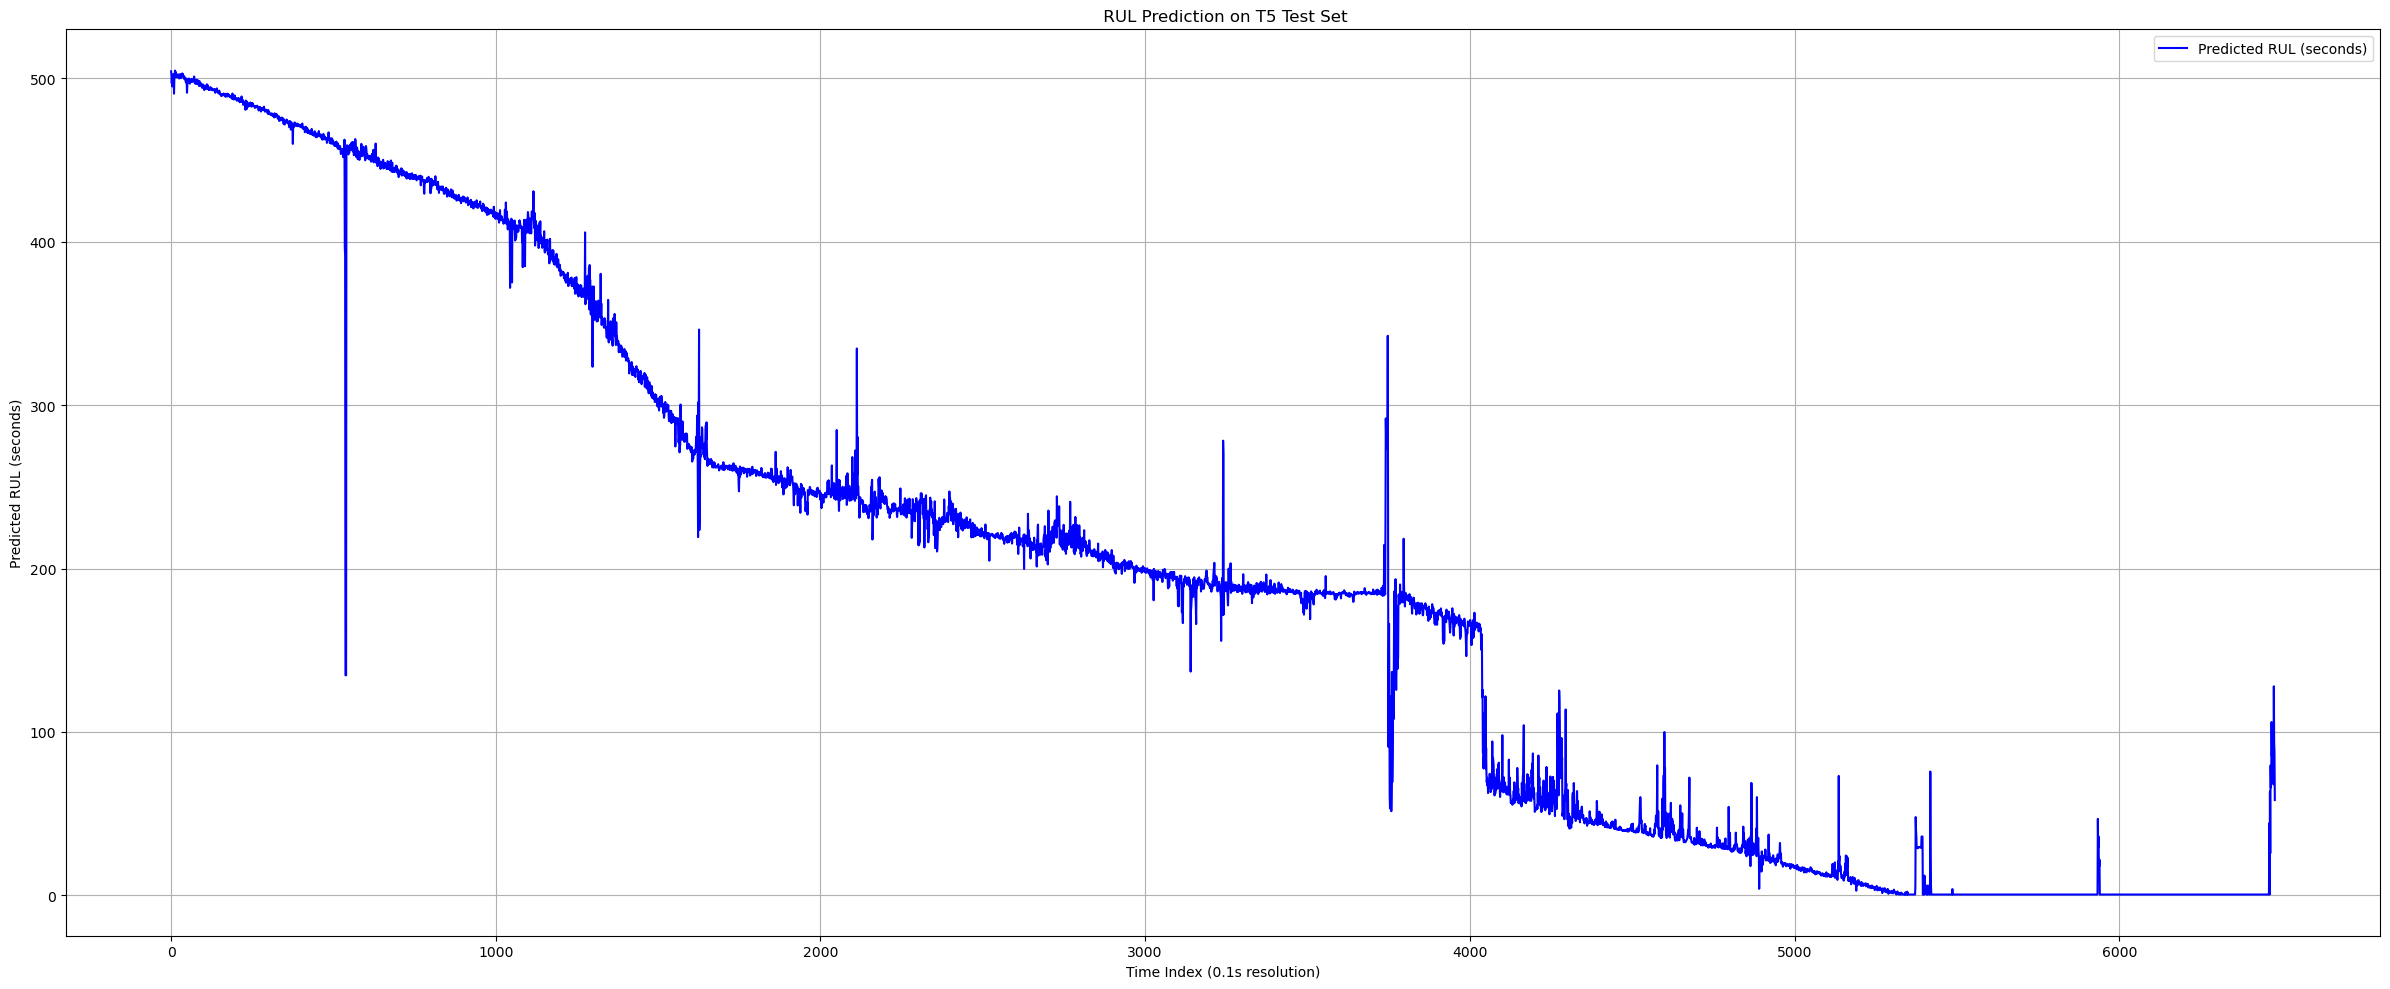


🔍 샘플별 예측 RUL (앞 20개):
Sample 1: ⏳ Predicted RUL = 504.4 seconds
Sample 2: ⏳ Predicted RUL = 502.1 seconds
Sample 3: ⏳ Predicted RUL = 497.1 seconds
Sample 4: ⏳ Predicted RUL = 500.0 seconds
Sample 5: ⏳ Predicted RUL = 495.1 seconds
Sample 6: ⏳ Predicted RUL = 499.5 seconds
Sample 7: ⏳ Predicted RUL = 500.1 seconds
Sample 8: ⏳ Predicted RUL = 502.7 seconds
Sample 9: ⏳ Predicted RUL = 502.6 seconds
Sample 10: ⏳ Predicted RUL = 490.7 seconds
Sample 11: ⏳ Predicted RUL = 499.2 seconds
Sample 12: ⏳ Predicted RUL = 500.6 seconds
Sample 13: ⏳ Predicted RUL = 504.8 seconds
Sample 14: ⏳ Predicted RUL = 503.6 seconds
Sample 15: ⏳ Predicted RUL = 503.0 seconds
Sample 16: ⏳ Predicted RUL = 503.8 seconds
Sample 17: ⏳ Predicted RUL = 502.4 seconds
Sample 18: ⏳ Predicted RUL = 500.8 seconds
Sample 19: ⏳ Predicted RUL = 500.6 seconds
Sample 20: ⏳ Predicted RUL = 502.2 seconds


In [67]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === T5 TEST 데이터 불러오기 ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === Feature 구성 ===
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))

# === Tensor 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === 학습된 모델 불러오기
model = RUL_MLP(input_dim=2).to(device)
model.load_state_dict(torch.load("rul_mlp_model.pth"))
model.eval()

# === 예측
with torch.no_grad():
    rul_predictions = model(X_test_tensor).cpu().numpy().flatten()

# === 시각화
plt.figure(figsize=(24, 10))
plt.plot(rul_predictions, label='Predicted RUL (seconds)', color='blue')
plt.xlabel('Time Index (0.1s resolution)')
plt.ylabel('Predicted RUL (seconds)')
plt.title(' RUL Prediction on T5 Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 예시 출력 
print("\n🔍 샘플별 예측 RUL (앞 20개):")
for i, p in enumerate(rul_predictions[:20]):
    print(f"Sample {i+1}: ⏳ Predicted RUL = {p:.1f} seconds")


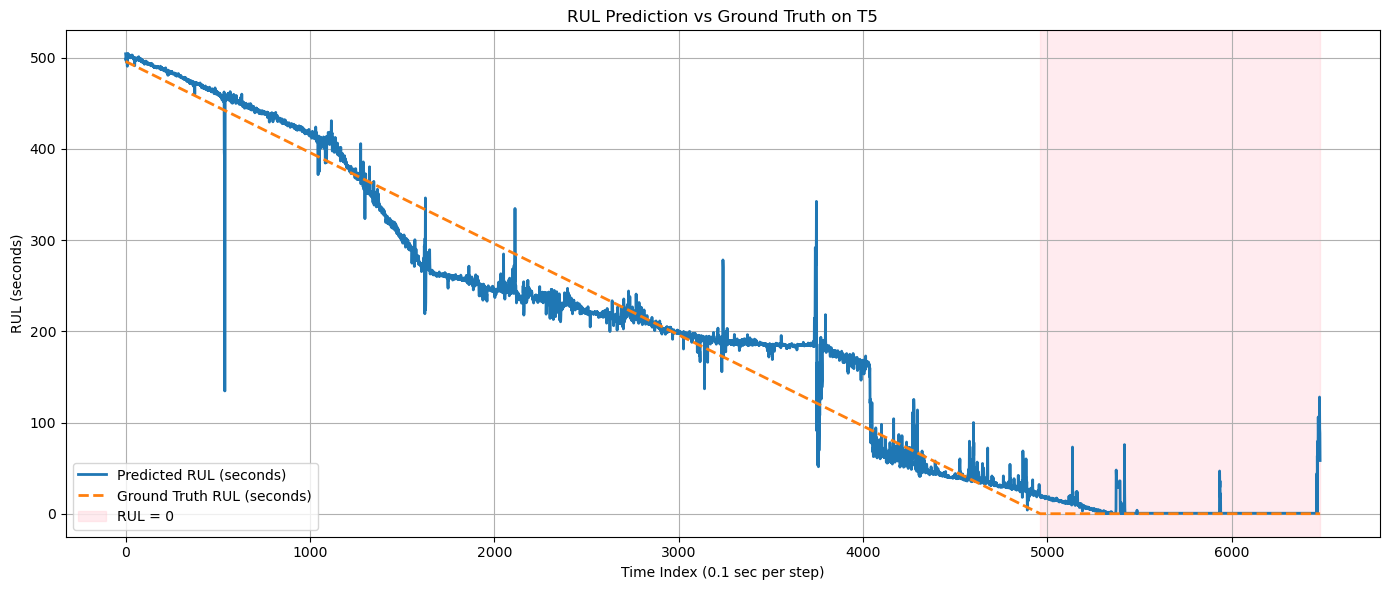

In [69]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === ✅ T5 TEST 데이터 불러오기
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === ✅ Feature 구성
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === ✅ Ground Truth RUL (초 단위)
rul_gt = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])

# === ✅ 모델 정의
class RUL_MLP(nn.Module):
    def __init__(self, input_dim):
        super(RUL_MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# === ✅ 모델 불러오기
model = RUL_MLP(input_dim=2).to(device)
model.load_state_dict(torch.load("rul_mlp_model.pth"))
model.eval()

# === ✅ 예측
with torch.no_grad():
    rul_pred = model(X_test_tensor).cpu().numpy().flatten()

# === ✅ 시각화
plt.figure(figsize=(14, 6))
plt.plot(rul_pred, label='Predicted RUL (seconds)', linewidth=2)
plt.plot(rul_gt, label='Ground Truth RUL (seconds)', linewidth=2, linestyle='--')

# 🔴 수명 종료 이후 영역 (분홍색 음영)
plt.axvspan(4960, 6480, color='pink', alpha=0.3, label='RUL = 0 ')

plt.xlabel('Time Index (0.1 sec per step)')
plt.ylabel('RUL (seconds)')
plt.title('RUL Prediction vs Ground Truth on T5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ T5 Test Set 성능 평가
Accuracy : 0.9847
F1 Score : 0.9675
AUROC    : 0.9941


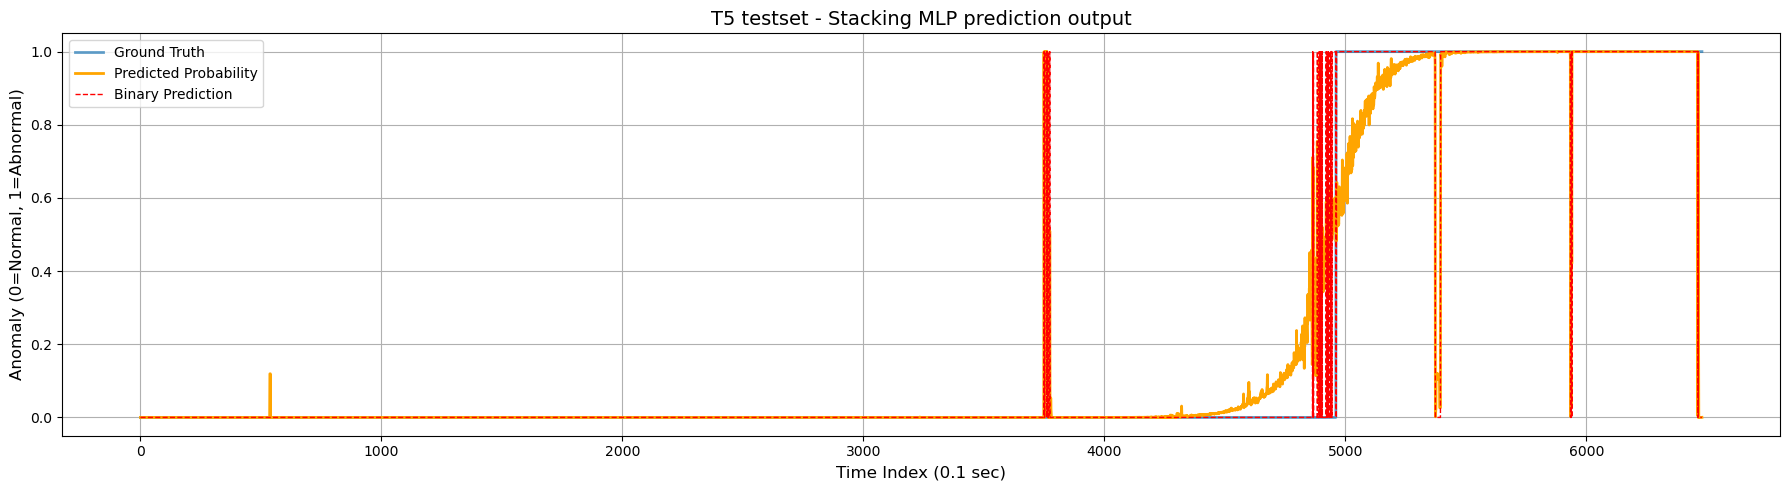

In [63]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === ✅ T5 TEST CSV 불러오기 ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN 확률
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU 예측값

# === ✅ Feature 생성 (GRU + CNN)
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])  # Ground Truth

# === ✅ Tensor 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# === ✅ 모델 평가
mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy().flatten()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === ✅ 성능 지표 출력
print("✅ T5 Test Set 성능 평가")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")

# === ✅ 그래프 시각화
plt.figure(figsize=(18, 5))
plt.plot(y_test, label="Ground Truth", linewidth=2, alpha=0.7)
plt.plot(y_pred_prob, label="Predicted Probability", color='orange', linewidth=2)
plt.plot(y_pred_cls, label="Binary Prediction", linestyle='--', color='red', linewidth=1)

plt.title("T5 testset - Stacking MLP prediction output", fontsize=14)
plt.xlabel("Time Index (0.1 sec)", fontsize=12)
plt.ylabel("Anomaly (0=Normal, 1=Abnormal)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### dummy

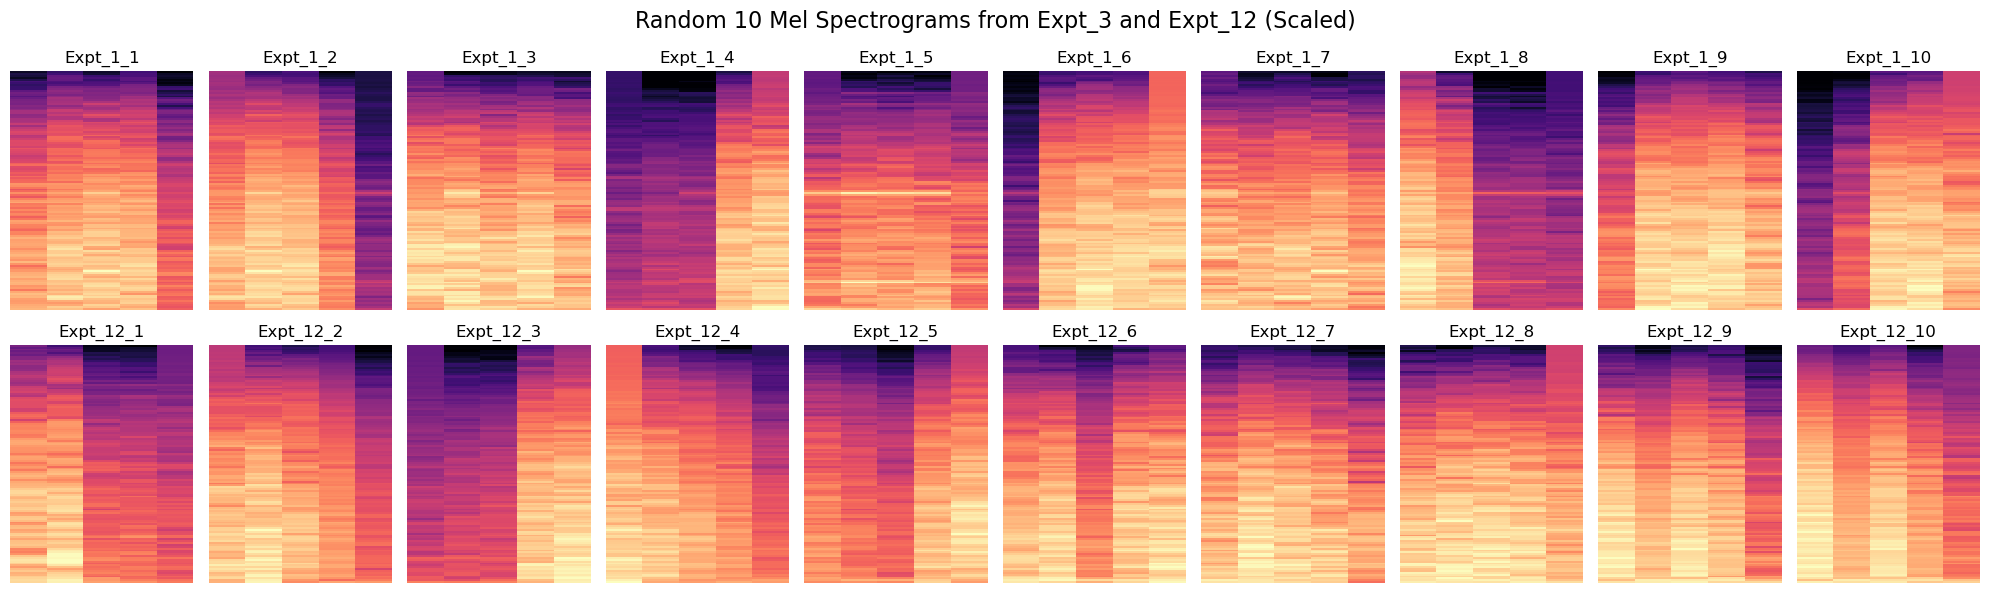

In [36]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, 
                                              n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 및 시각화 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([1, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # === ✅ 방법 4 적용: 신호 크기 Scaling ===
        signal_scaled = signal_interpolated * np.mean(signal_interpolated)  # 크기에 비례한 Scaling
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_scaled, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12 (Scaled)", fontsize=16)
plt.tight_layout()
plt.show()


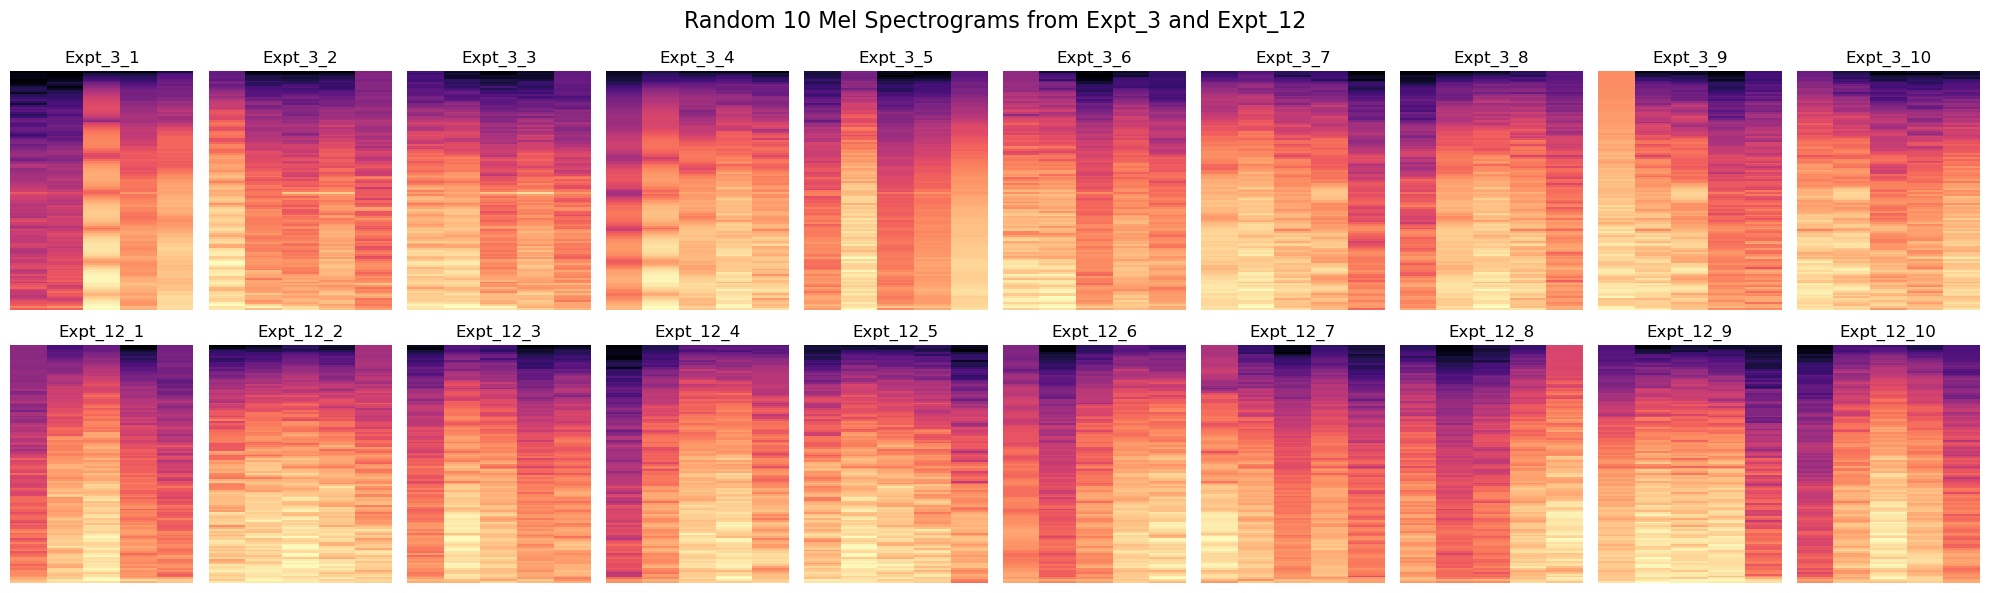

In [22]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # 무작위로 10개만 생성하여 시각화
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_3과 Expt_12에서 무작위 10개 생성 ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([3, 12]):  # Expt_3, Expt_12 처리
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 무작위 시작점 선택 (겹치지 않도록 설정)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # 슬라이싱
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12", fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

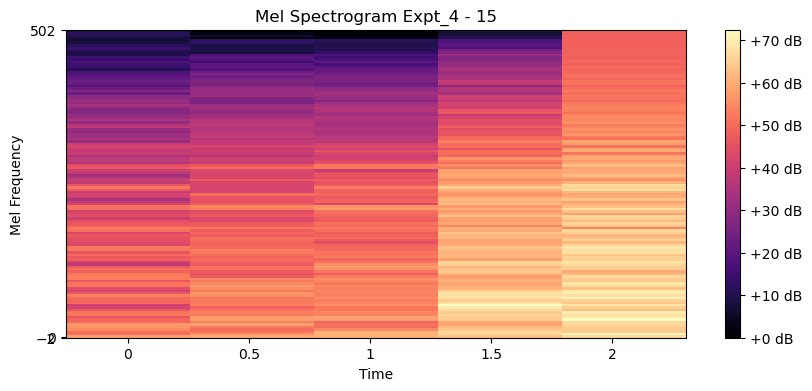

In [20]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# === ✅ 설정 ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
output_dir = "JJ/Harvard_Multimodal/Mel_spectrogram/T1"
num_splits = 540  # 생성할 Mel Spectrogram 개수
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트 (1000Hz, 동일한 조건 유지)
n_fft = 1000  # FFT 크기 (조건 유지)
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수
fmax = 500  # 저주파 강조 (고주파 영향 줄이기)

# 출력 폴더 생성
os.makedirs(output_dir, exist_ok=True)

# === ✅ Mel Spectrogram 변환 함수 ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram 변환 (저주파 강조)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # 약한 신호도 강조
    return mel_spec_db

# === ✅ Expt_1~Expt_12 반복 ===
image_index = 1  # 전체 이미지 번호
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Stride 계산 (겹치도록 자동 조정)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540개 Mel Spectrogram 생성
    for split_idx in range(num_splits):
        # 슬라이싱
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # 시각화 및 저장
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # 파일 저장
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # 이미지 인덱스 증가
        image_index += 1

print(f"Mel Spectrogram 생성 완료. 총 {image_index-1}개 이미지 저장됨.")
